In [1]:
import pandas as pd
import geopandas as gpd
import mapclassify
import pysal
import matplotlib.pyplot as plt

#### import lodes.parquet

In [2]:
lodes = gpd.read_parquet("lodes.parquet")

In [3]:
lodes.explore()

In [4]:
lodes.columns

Index(['geoid', 'year', 'CFA01', 'CFA02', 'CFA03', 'CFA04', 'CFA05', 'CFS01',
       'CFS02', 'CFS03', 'CFS04', 'CFS05', 'aland20', 'awater20',
       'create_date', 'earnings_1251_3333', 'earnings_over_3333',
       'earnings_under_1250', 'education_bachelors', 'education_hs',
       'education_lths', 'education_some_college', 'employees_30_54',
       'employees_55plus', 'employees_asian', 'employees_black',
       'employees_female', 'employees_hawaiian_pi', 'employees_hispanic',
       'employees_male', 'employees_native_american', 'employees_not_hispanic',
       'employees_twoplus_races', 'employees_under_30', 'employees_white',
       'geometry', 'housing_units', 'naics_11', 'naics_21', 'naics_22',
       'naics_23', 'naics_31_33', 'naics_42', 'naics_44_45', 'naics_48_49',
       'naics_51', 'naics_52', 'naics_53', 'naics_54', 'naics_55', 'naics_56',
       'naics_61', 'naics_62', 'naics_71', 'naics_72', 'naics_81', 'naics_92',
       'population', 'total_employees'],
      dtyp

### Table of Names

11 -- Agriculture, Forestry, Fishing and Hunting

21 -- Mining, Quarrying, and Oil and Gas Extraction

22 -- Utilities

23 -- Construction

31_33 -- Manufacturing

42 -- Wholesale Trade

44_45 -- Retail Trade

48_49 -- Transportation and Warehousing

51 -- Information

52 -- Finance and Insurance

53 -- Real Estate and Rental and Licensing

54 -- Professional, Scientific, and Technical Services

55 -- Management of Companies and Enterprises

56 -- Administrative and Support and Waste Managment

61 -- Educational services

62 -- Health Care and Social Assistance

71 -- Arts, Entertainment, and Recreation

72 -- Accommodation and Food Services

81 -- Other Services (except Public Administration)

92 -- Public Administration

CFA Firm Age: 0-1, 2-3, 4-5, 6-10, 11+

CFS Firm Size: 0-19, 20-49, 50-249, 250-499, 500+

In [5]:
industries = [
    'naics_11',
    'naics_21',
    'naics_22',
    'naics_23',
    'naics_31_33',
    'naics_42',
    'naics_44_45',
    'naics_48_49',
    'naics_51',
    'naics_52',
    'naics_53', 
    'naics_54',
    'naics_55',
    'naics_56',
    'naics_61',
    'naics_62',
    'naics_71',
    'naics_72',
    'naics_81',
    'naics_92'
]

/opt/tljh/user/lib/python3.10/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)
/opt/tljh/user/lib/python3.10/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)
/opt/tljh/user/lib/python3.10/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)
/opt/tljh/user/lib/python3.10/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)
/opt/tljh/user/lib/python3.10/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)
/opt/tljh/user/lib/python3.10/site-packages/mapcla

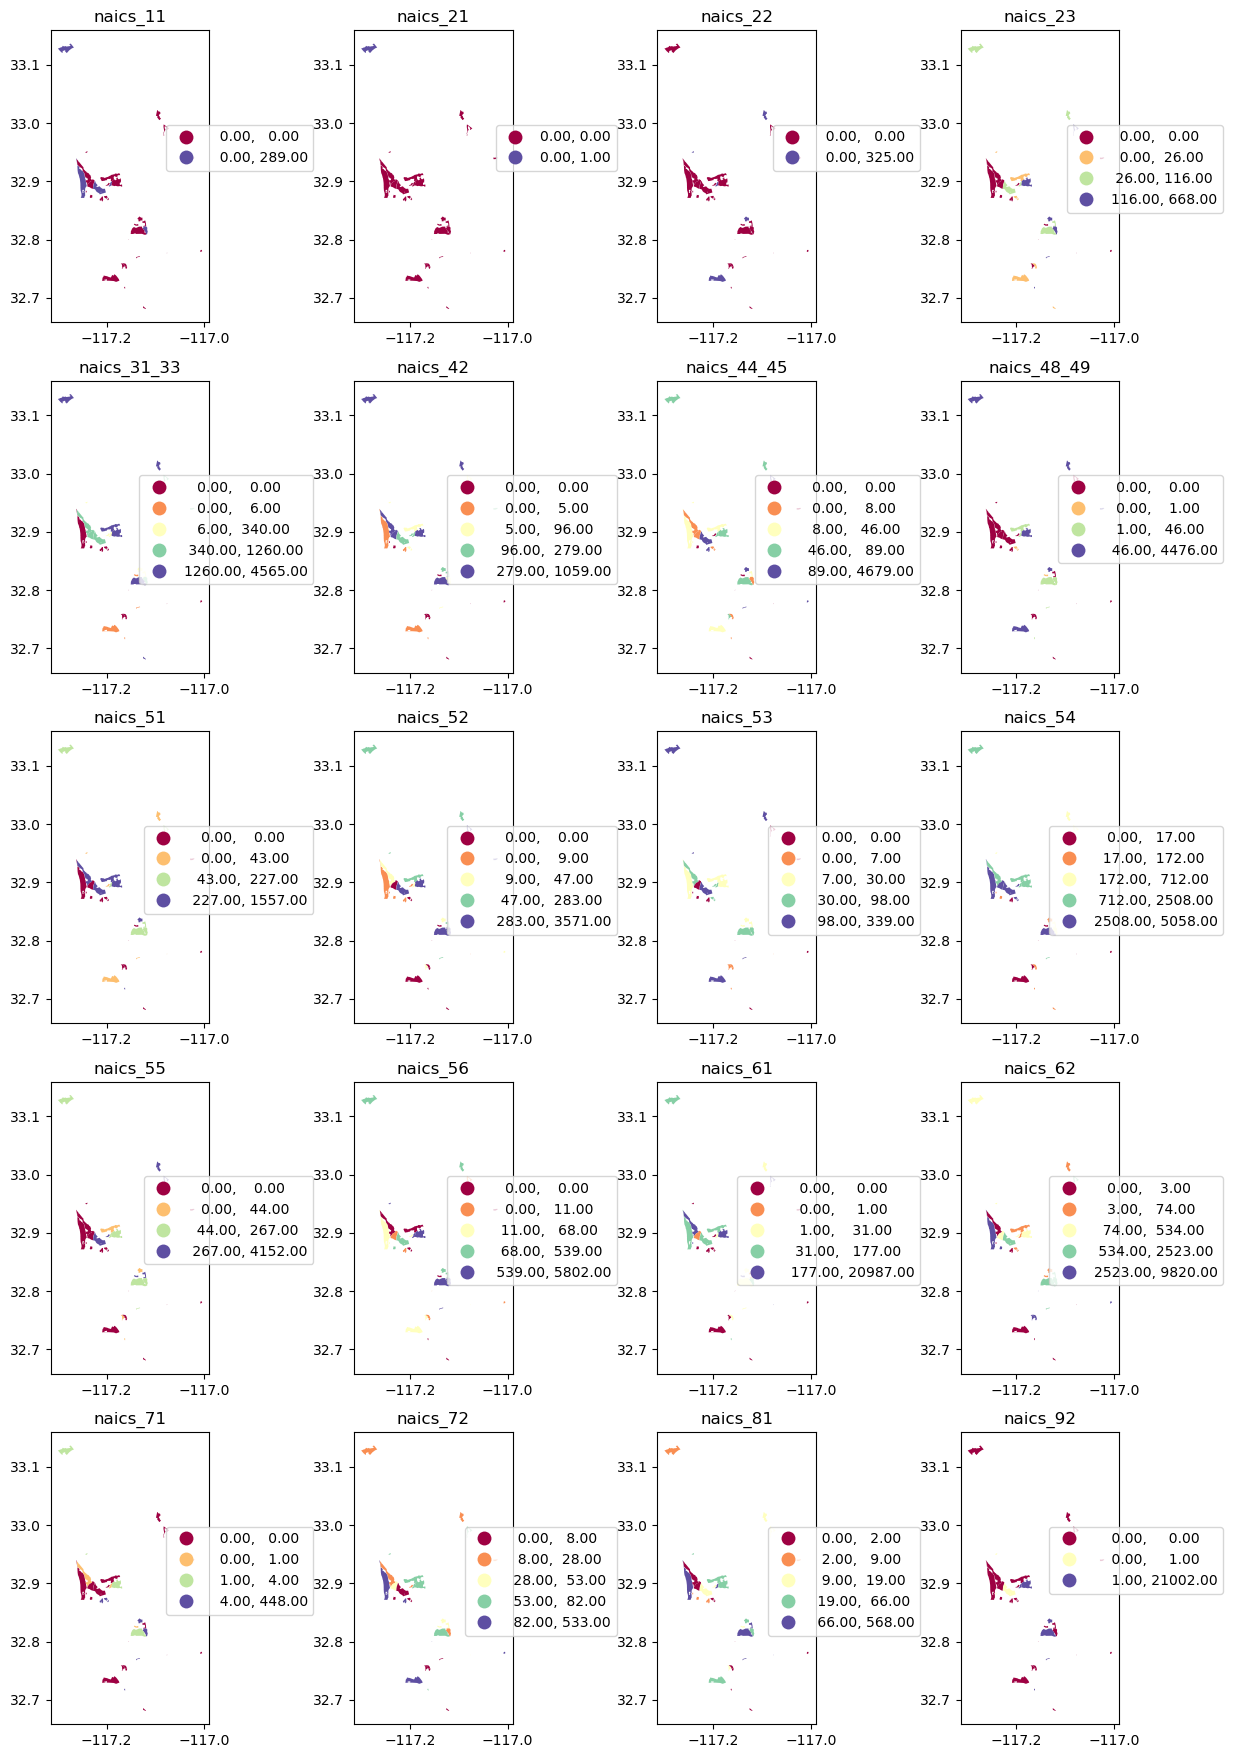

In [6]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(15, 22))

axs=axs.flatten()

for i, col in enumerate(industries):
    ax = axs[i]
    lodes.plot(column=col, ax=ax, scheme='Quantiles',
                       k=5, cmap='Spectral', legend=True,
                       legend_kwds={'bbox_to_anchor': (1.7, 0.7), "fmt": "{:.2f}"})
    ax.set_title(col)

In [7]:
lodes['primary'] = lodes[industries].max(axis=1)
lodes

,geoid,year,CFA01,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,...,naics_56,naics_61,naics_62,naics_71,naics_72,naics_81,naics_92,population,total_employees,primary
214,060730004002000,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,68.0,0.0,9820.0,0.0,0.0,18.0,0.0,121,9995.0,9820.0
229,060730004004000,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,4177.0,0.0,0.0,0.0,0.0,1019,4272.0,4177.0
1604,060730028011010,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,3343.0,0.0,0.0,35.0,568.0,0.0,27,4007.0,3343.0
3062,060730038001018,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,984,4148.0,4092.0
3859,060730053021009,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,42.0,2.0,26.0,82.0,2.0,11185.0,48,12455.0,11185.0
4265,060730062001000,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,0.0,0.0,0.0,162.0,66.0,0.0,0,5000.0,4476.0
5937,060730083051007,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,20987.0,0.0,0.0,49.0,3.0,1.0,0,21112.0,20987.0
5948,060730083051018,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.0,0.0,4071.0,0.0,0.0,3.0,0.0,66,4263.0,4071.0
6079,060730083121001,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.0,46.0,3026.0,0.0,260.0,106.0,0.0,427,6133.0,3026.0
6410,060730083391005,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,664.0,2.0,1.0,15.0,2.0,0.0,0,4571.0,2508.0


In [8]:
lodes['pct'] = lodes['primary'] / lodes['total_employees']
lodes

,geoid,year,CFA01,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,...,naics_61,naics_62,naics_71,naics_72,naics_81,naics_92,population,total_employees,primary,pct
214,060730004002000,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9820.0,0.0,0.0,18.0,0.0,121,9995.0,9820.0,0.982491
229,060730004004000,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4177.0,0.0,0.0,0.0,0.0,1019,4272.0,4177.0,0.977762
1604,060730028011010,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3343.0,0.0,0.0,35.0,568.0,0.0,27,4007.0,3343.0,0.834290
3062,060730038001018,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,984,4148.0,4092.0,0.986500
3859,060730053021009,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.0,2.0,26.0,82.0,2.0,11185.0,48,12455.0,11185.0,0.898033
4265,060730062001000,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,162.0,66.0,0.0,0,5000.0,4476.0,0.895200
5937,060730083051007,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20987.0,0.0,0.0,49.0,3.0,1.0,0,21112.0,20987.0,0.994079
5948,060730083051018,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4071.0,0.0,0.0,3.0,0.0,66,4263.0,4071.0,0.954961
6079,060730083121001,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46.0,3026.0,0.0,260.0,106.0,0.0,427,6133.0,3026.0,0.493396
6410,060730083391005,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,664.0,2.0,1.0,15.0,2.0,0.0,0,4571.0,2508.0,0.548676


In [9]:
lodes.explore(column='pct')